In [141]:
import pm4py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [142]:
if __name__ == "__main__":
    log_2012 = pm4py.read_xes('BPI_Challenge_2012.xes.gz')

parsing log, completed traces :: 100%|██████████| 13087/13087 [00:08<00:00, 1457.26it/s]


In [143]:
if __name__ == "__main__":
    dataframe_2012 = pm4py.convert_to_dataframe(log_2012)
    dataframe_2012.to_csv('dataframe_2012.csv')

c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


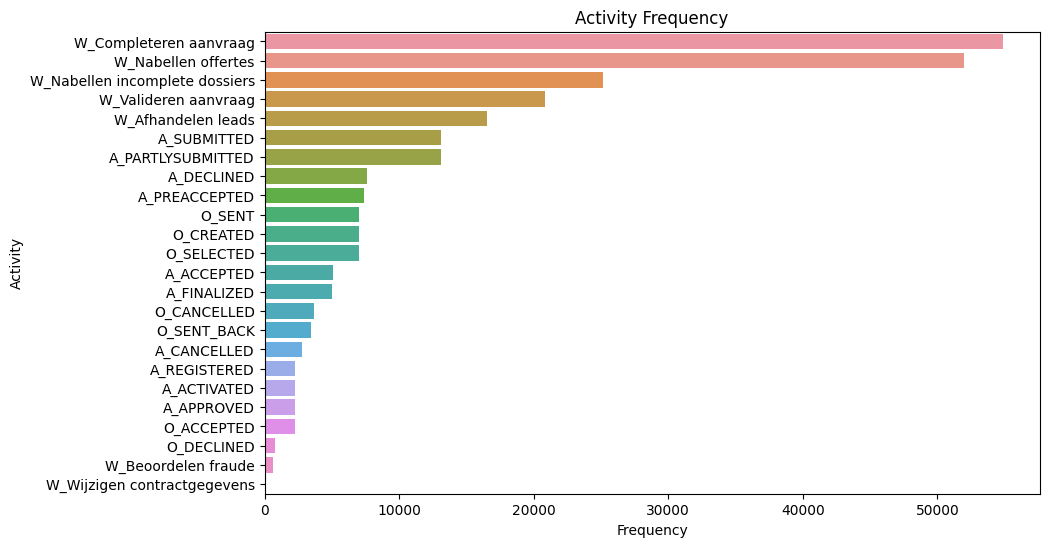

In [144]:
# Assuming 'concept:name' column contains the activity names
activity_counts = dataframe_2012['concept:name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=activity_counts.values, y=activity_counts.index)
plt.xlabel('Frequency')
plt.ylabel('Activity')
plt.title('Activity Frequency')
plt.show()


C:\Users\20193501\AppData\Local\Temp\ipykernel_17856\1111879368.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'min' instead.
  case_durations = dataframe_2012.groupby('case:concept:name')['time:timestamp'].agg([min, max])
C:\Users\20193501\AppData\Local\Temp\ipykernel_17856\1111879368.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  case_durations = dataframe_2012.groupby('case:concept:name')['time:timestamp'].agg([min, max])
c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

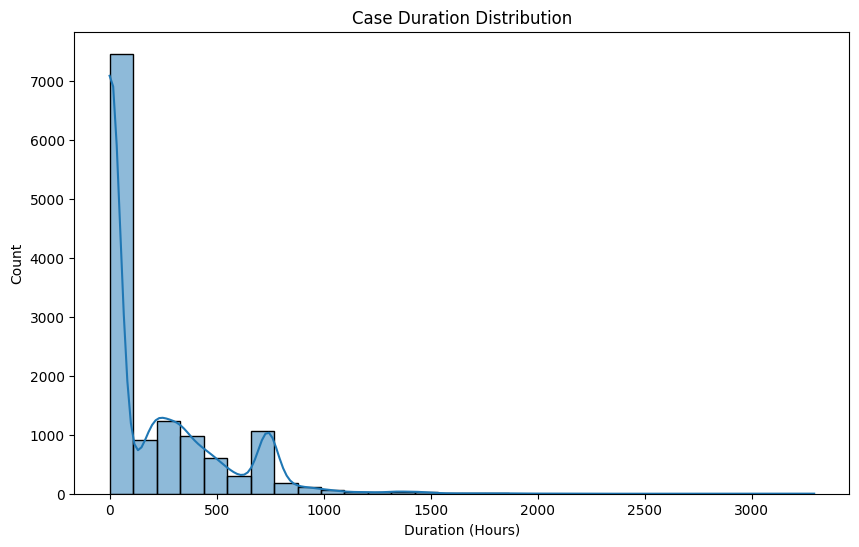

In [145]:
# Assuming 'time:timestamp' is the timestamp and 'case:concept:name' is the case ID
dataframe_2012['time:timestamp'] = pd.to_datetime(dataframe_2012['time:timestamp'])
case_durations = dataframe_2012.groupby('case:concept:name')['time:timestamp'].agg([min, max])
case_durations['duration'] = (case_durations['max'] - case_durations['min']).dt.total_seconds() / 3600  # Duration in hours

plt.figure(figsize=(10, 6))
sns.histplot(case_durations['duration'], bins=30, kde=True)
plt.xlabel('Duration (Hours)')
plt.ylabel('Count')
plt.title('Case Duration Distribution')
plt.show()


c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


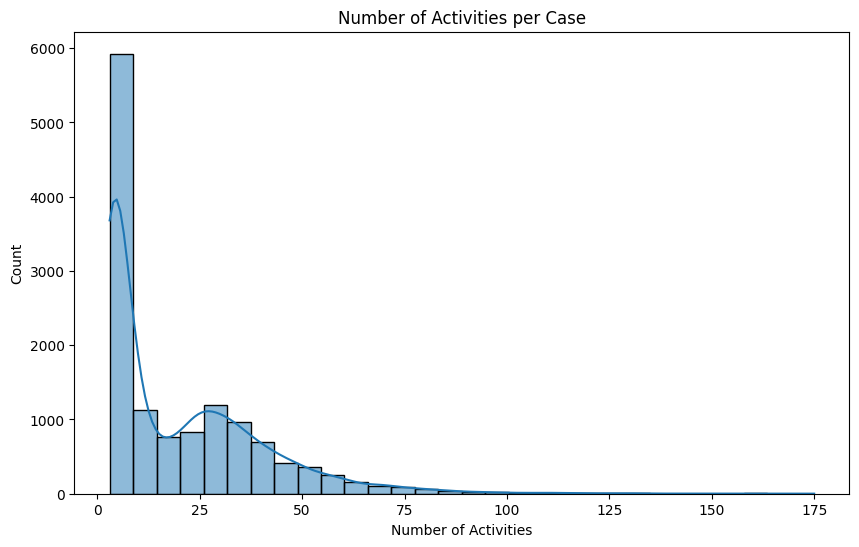

In [146]:
activities_per_case = dataframe_2012.groupby('case:concept:name').size()

plt.figure(figsize=(10, 6))
sns.histplot(activities_per_case, bins=30, kde=True)
plt.xlabel('Number of Activities')
plt.ylabel('Count')
plt.title('Number of Activities per Case')
plt.show()


In [147]:
dataframe_2012

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
4,NaN,START,W_Completeren aanvraag,2011-10-01 11:36:46.437000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
...,...,...,...,...,...,...,...
262195,112,COMPLETE,A_PARTLYSUBMITTED,2012-02-29 23:51:17.423000+00:00,2012-02-29 23:51:16.799000+00:00,214376,15000
262196,112,SCHEDULE,W_Afhandelen leads,2012-02-29 23:52:01.287000+00:00,2012-02-29 23:51:16.799000+00:00,214376,15000
262197,11169,START,W_Afhandelen leads,2012-03-01 09:26:46.736000+00:00,2012-02-29 23:51:16.799000+00:00,214376,15000
262198,11169,COMPLETE,A_DECLINED,2012-03-01 09:27:37.118000+00:00,2012-02-29 23:51:16.799000+00:00,214376,15000


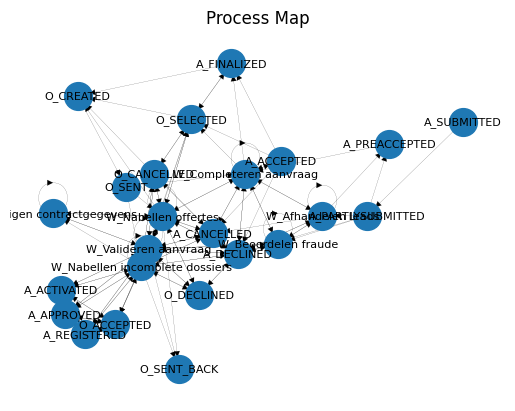

In [148]:
# Sort by case_id and timestamp
dataframe_2012.sort_values(by=['case:concept:name', 'time:timestamp'], inplace=True)

# Create a directed graph
G = nx.DiGraph()

# Add edges for transitions between activities
for i in range(1, len(dataframe_2012)):
    if dataframe_2012.iloc[i]['case:concept:name'] == dataframe_2012.iloc[i - 1]['case:concept:name']:
        G.add_edge(dataframe_2012.iloc[i - 1]['concept:name'], dataframe_2012.iloc[i]['concept:name'])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=400)
nx.draw_networkx_edges(G, pos, width=0.1)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
plt.title("Process Map")
plt.axis("off")
plt.show()

In [149]:
dataframe_2012['concept:name'].value_counts()

concept:name
W_Completeren aanvraag            54850
W_Nabellen offertes               52016
W_Nabellen incomplete dossiers    25190
W_Valideren aanvraag              20809
W_Afhandelen leads                16566
A_SUBMITTED                       13087
A_PARTLYSUBMITTED                 13087
A_DECLINED                         7635
A_PREACCEPTED                      7367
O_SENT                             7030
O_CREATED                          7030
O_SELECTED                         7030
A_ACCEPTED                         5113
A_FINALIZED                        5015
O_CANCELLED                        3655
O_SENT_BACK                        3454
A_CANCELLED                        2807
A_REGISTERED                       2246
A_ACTIVATED                        2246
A_APPROVED                         2246
O_ACCEPTED                         2243
O_DECLINED                          802
W_Beoordelen fraude                 664
W_Wijzigen contractgegevens          12
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

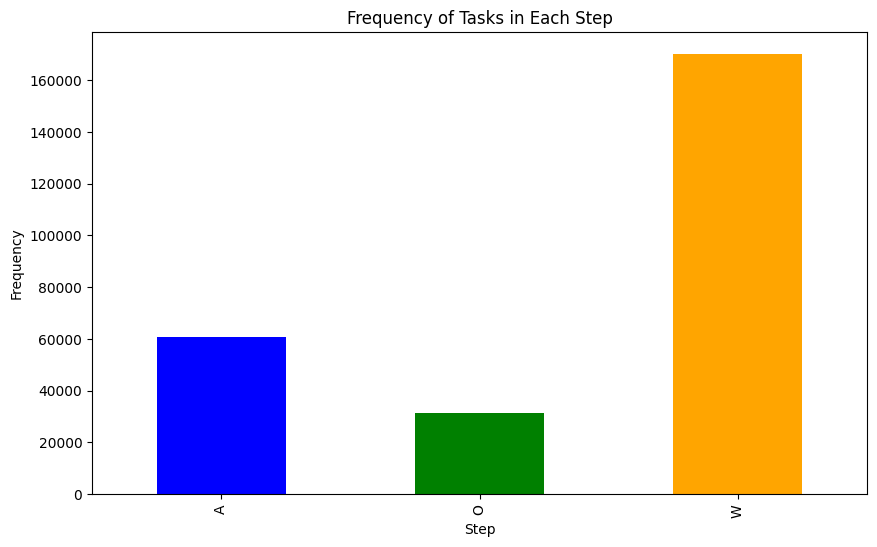

In [150]:
# Extract prefixes ('W_', 'O_', 'A_')
dataframe_2012['prefix'] = dataframe_2012['concept:name'].str.split('_').str[0]

# Create separate columns for each step
dataframe_2012['W'] = dataframe_2012['prefix'].apply(lambda x: x == 'W')
dataframe_2012['O'] = dataframe_2012['prefix'].apply(lambda x: x == 'O')
dataframe_2012['A'] = dataframe_2012['prefix'].apply(lambda x: x == 'A')

# Plot the frequency of tasks chosen at each step
fig, ax = plt.subplots(figsize=(10, 6))

dataframe_2012.groupby('prefix').size().plot(kind='bar', color=['blue', 'green', 'orange'], ax=ax)
ax.set_title('Frequency of Tasks in Each Step')
ax.set_xlabel('Step')
ax.set_ylabel('Frequency')

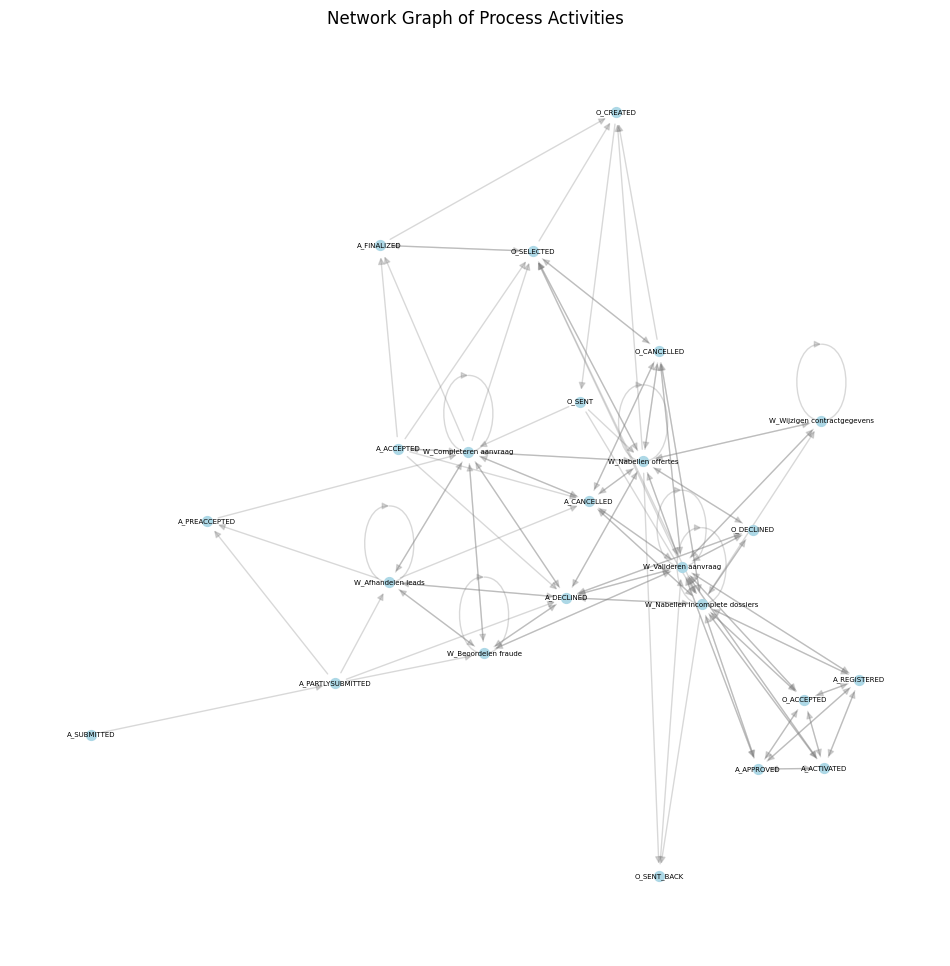

In [151]:
# Create a directed graph
G = nx.DiGraph()

# Add edges for transitions between activities for each case
# Here, we'll track the last activity to create a sequence within each case
last_activity = {}

for index, row in dataframe_2012.iterrows():
    case_id = row['case:concept:name']
    activity = row['concept:name']
    
    # Check if the current case had a previous activity
    if case_id in last_activity:
        # Add edge from last activity to current activity for the same case
        G.add_edge(last_activity[case_id], activity)
    
    # Update the last activity for the current case
    last_activity[case_id] = activity

# Use a spring layout to visualize the graph, attempting to reflect some hierarchy or sequence
pos = nx.spring_layout(G, seed=42)  # Seed for reproducible layout

# Drawing the graph
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="lightblue")
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")

plt.title("Network Graph of Process Activities")
plt.axis("off")  # Turn off the axis
plt.show()

In [153]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np


dataframe_2012['time:timestamp'] = pd.to_datetime(dataframe_2012['time:timestamp'])

# Extract day of the week from time:timestamp
dataframe_2012['day_of_week'] = dataframe_2012['time:timestamp'].dt.dayofweek

# Generate event sequence numbers within each case
dataframe_2012.sort_values(by=['case:concept:name', 'time:timestamp'], inplace=True)
dataframe_2012['event_seq'] = dataframe_2012.groupby('case:concept:name').cumcount() + 1

# Calculate time to next event within each case
dataframe_2012['time_to_next_event'] = dataframe_2012.groupby('case:concept:name')['time:timestamp'].diff().shift(-1).dt.total_seconds().fillna(0)

# For demonstration, convert time_to_next_event from seconds to minutes
dataframe_2012['time_to_next_event'] = dataframe_2012['time_to_next_event'] / 60


# Define features (X) and target (y)
X = dataframe_2012[['day_of_week', 'event_seq']]
y = dataframe_2012['time_to_next_event']

# Initialize the linear regression model
model = LinearRegression()

# Define the k-fold cross-validation parameters
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform the 10-fold cross-validation
# We'll use the negative mean absolute error as our scoring metric, so results will be negative
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert scores to positive values for mean absolute error
mae_scores = -scores

print(f"Mean Absolute Error for each fold: {mae_scores}")
print(f"Average Mean Absolute Error: {mae_scores.mean()}")



Mean Absolute Error for each fold: [1064.43768809 1042.4000624  1043.0410242  1057.63206114 1065.94884219
 1048.35852762 1029.76752652 1038.01037404 1031.4791356  1048.94617251]
Average Mean Absolute Error: 1047.002141431308
